## For the first few weeks of the course we will be working with 1 dimensional (1D) observational data in the form of Comma Seperated Values (CSV) files. CSV files are plain text files that store data by delimiting data entries with commas. CSV files can be opened in text editors, spreadsheet programs like Excel, or other specialized applications.

We will use the Python libraries Pandas and Matplotlib to work with an analyze the 1-dimensional timeseries of observational data. In the cells below, we will import these libraries and assign __aliases__ for them (think of these as nick-names that we can use instead of constantly typing out the entire name everytime we call the library).

In [30]:
import pandas as pd                          # It is common to import Pandas under the pd alias.
import matplotlib.pyplot as plt              # It is common to import Matplotlib under the pd plt.

# magic function that renders the figure in a notebook
%matplotlib inline                           

# Use %config InlineBackend.figure_format = 'retina' after %matplotlib inline to render higher resolution images.

%config InlineBackend.figure_format='retina' # Use %config InlineBackend.figure_format = 'retina' after %matplotlib inline to render higher resolution images.
plt.rcParams['figure.figsize'] = 12,6   #default figure size

## Before getting started, you should have worked through the following tutorial: https://www.w3schools.com/python/pandas/pandas_series.asp

### Load a CSV file into a Pandas DataFrame

In [2]:
df_CO2 = pd.read_csv('/home/pachamama/shared/model_output/obs/Greenhouse_Gases/CO2/MaunaLoa_CO2.csv')

### Display the top five rows (head) of the DataFrame using the head() method. This is a great method for getting a quick overview of the DataFrame. By default it will return the first 5 rows if you put nothing in your closed (), but you can specify the number of rows by inserting a number in the closed (). Try it!

In [3]:
df_CO2.head(0) 

,Year,Month,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty


### Just like head(), you can list the last rows of a DataFrame by using the tail() method. You can specify the rows from the bottom by inserting a number in the closed ().

In [4]:
df_CO2.tail() 

,Year,Month,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
776,2022,11,417.51,NaN
777,2022,12,418.95,NaN
778,2023,1,419.47,NaN
779,2023,2,420.41,NaN
780,2023,3,421.00,NaN


### The DataFrames object has a method called info(), that gives you more information about the data set. Here we can see that this DataFrame is composed of 4 distinct columns named 'Year', 'Month', 'Mauna Loa CO2', and 'Mauna Loa CO2 uncertainty', with Data Types of int64, int64, float64, float64. There  RangeIndex tells us there are 781 rows from0 to 780 spanning 4 columns. 

### The Non-Null Count tells us that the column named 'Mauna Loa CO2 uncertainty' has 781 values that are NaN values. We can ignore this for now as we won't be using this data. However there may be situatons where you want to "clean" your datasets and remove NaN values. If you find yourself in this situation .... follow this tutorial: https://www.w3schools.com/python/pandas/pandas_cleaning.asp

In [5]:
df_CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       781 non-null    int64  
 1   Month                      781 non-null    int64  
 2   Mauna Loa CO2 (ppm)        781 non-null    float64
 3   Mauna Loa CO2 uncertainty  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 24.5 KB


### We can specify the index of the DataFrame to return a specific value

In [6]:
df_CO2.loc[0]

Year                         1958.0
Month                           3.0
Mauna Loa CO2 (ppm)           315.7
Mauna Loa CO2 uncertainty       NaN
Name: 0, dtype: float64

In [7]:
df_CO2.loc[780]

Year                         2023.0
Month                           3.0
Mauna Loa CO2 (ppm)           421.0
Mauna Loa CO2 uncertainty       NaN
Name: 780, dtype: float64

### Return the values of the first two rows of the DataFrame

In [8]:
df_CO2.loc[[0,1]]

,Year,Month,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
0,1958,3,315.70,NaN
1,1958,4,317.45,NaN


### We can compute the mean, median, and mode across the entire DataFrame. 
#### Recall that:
##### Mean = the average value (sum of all values divided by the number of values)
##### Median = the value in the middle, after you sorted all values in ascending order.
##### Mode = the value that appears most frequently

In [9]:
average_CO2_ppm = df_CO2["Mauna Loa CO2 (ppm)"].mean()
average_CO2_ppm

357.98245838668373

In [10]:
mode_CO2_ppm = df_CO2["Mauna Loa CO2 (ppm)"].mode()
mode_CO2_ppm

0    336.14
Name: Mauna Loa CO2 (ppm), dtype: float64

In [11]:
mode_CO2_ppm = df_CO2["Mauna Loa CO2 (ppm)"].median()
mode_CO2_ppm

354.23

### Okay so how would be plot this data?? Recall using .head() or .info() above, that we could see how this data was set up. To plot a timeseries, we would need it to plot CO2 concentration in ppm on the y-axis and the calendar date on the x-axis. Right now the data is in order by year and numbered by months 1 - 12. How can we turn this into proper dates?

In [12]:
df_CO2.head()

,Year,Month,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
0,1958,3,315.70,NaN
1,1958,4,317.45,NaN
2,1958,5,317.51,NaN
3,1958,6,317.24,NaN
4,1958,7,315.86,NaN


### So it turns out that Pandas has a really nice to_datatime() method that will allow us to convert  a DataFrame or Series into a pandas datetime object. See more details here: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html. Here, the to_datetime method takes in arguments Year, Month, and Day. Our dataset does not contain a "day" column, so we can assign day = 1.

In [13]:
Calendar_Date = pd.to_datetime(df_CO2[['Year','Month']].assign(day=1))

### Visually inspect the output of the variable to make sure it starts and ends on the correct dates (see from when we printed out the head above!).

In [14]:
Calendar_Date

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
776   2022-11-01
777   2022-12-01
778   2023-01-01
779   2023-02-01
780   2023-03-01
Length: 781, dtype: datetime64[ns]

### Create a column called "Date" in our DataFrame and set it equal to the Calendar_Date variable we just created.

In [15]:
df_CO2['Date'] = Calendar_Date

### We can inspect the DataFrame and we now see that we have a new Column called "Date" that starts at March 1st, 1958.


In [16]:
df_CO2

,Year,Month,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty,Date
0,1958,3,315.70,NaN,1958-03-01
1,1958,4,317.45,NaN,1958-04-01
2,1958,5,317.51,NaN,1958-05-01
3,1958,6,317.24,NaN,1958-06-01
4,1958,7,315.86,NaN,1958-07-01
...,...,...,...,...,...
776,2022,11,417.51,NaN,2022-11-01
777,2022,12,418.95,NaN,2022-12-01
778,2023,1,419.47,NaN,2023-01-01
779,2023,2,420.41,NaN,2023-02-01


### Now we can use Pyplot, a submodule of the Matplotlib library to visualize the data, specifying the x and y axes that correspond to the Columns in our Pandas DataFrame.

<Axes: xlabel='Date'>

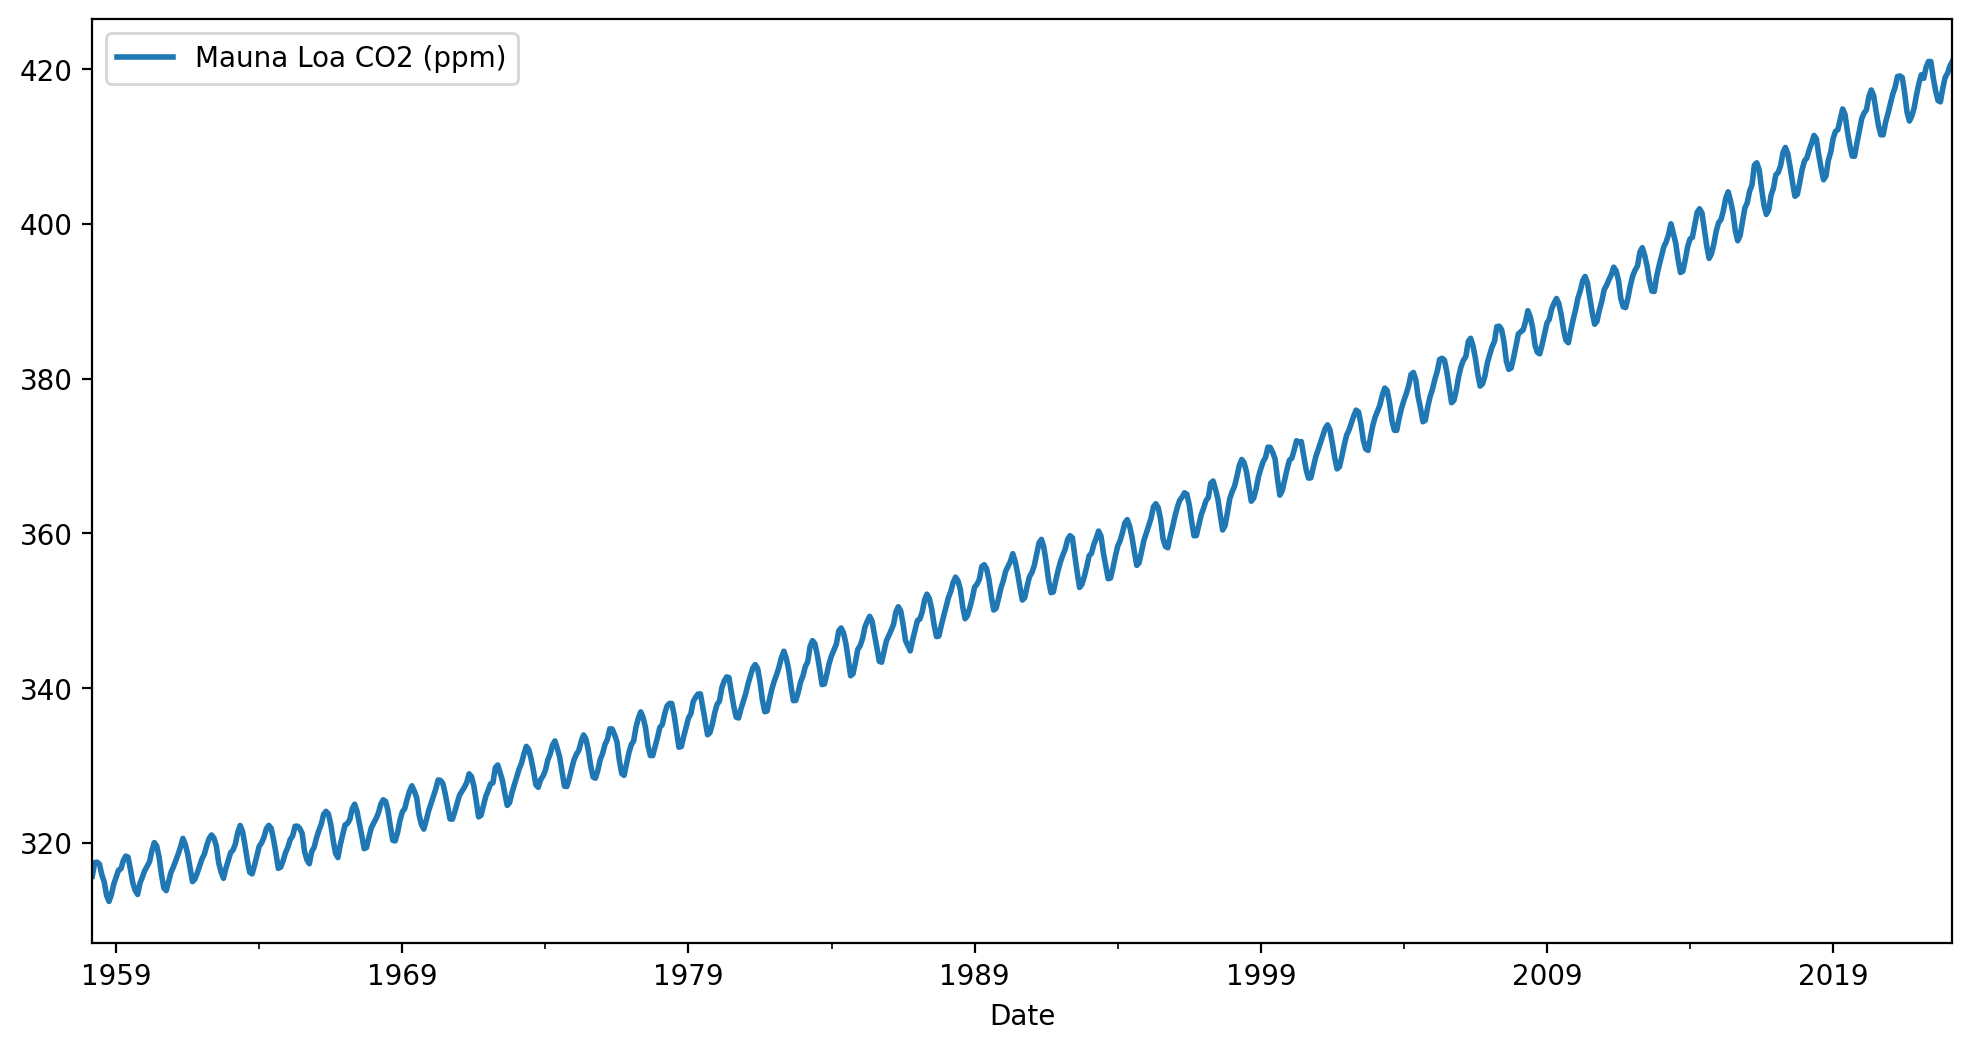

In [21]:
df_CO2.plot(x='Date',
            y='Mauna Loa CO2 (ppm)',
            linewidth=2)

### Or we can use matplotlib pyplot (plt.plot()) and specify the x, y as follows:

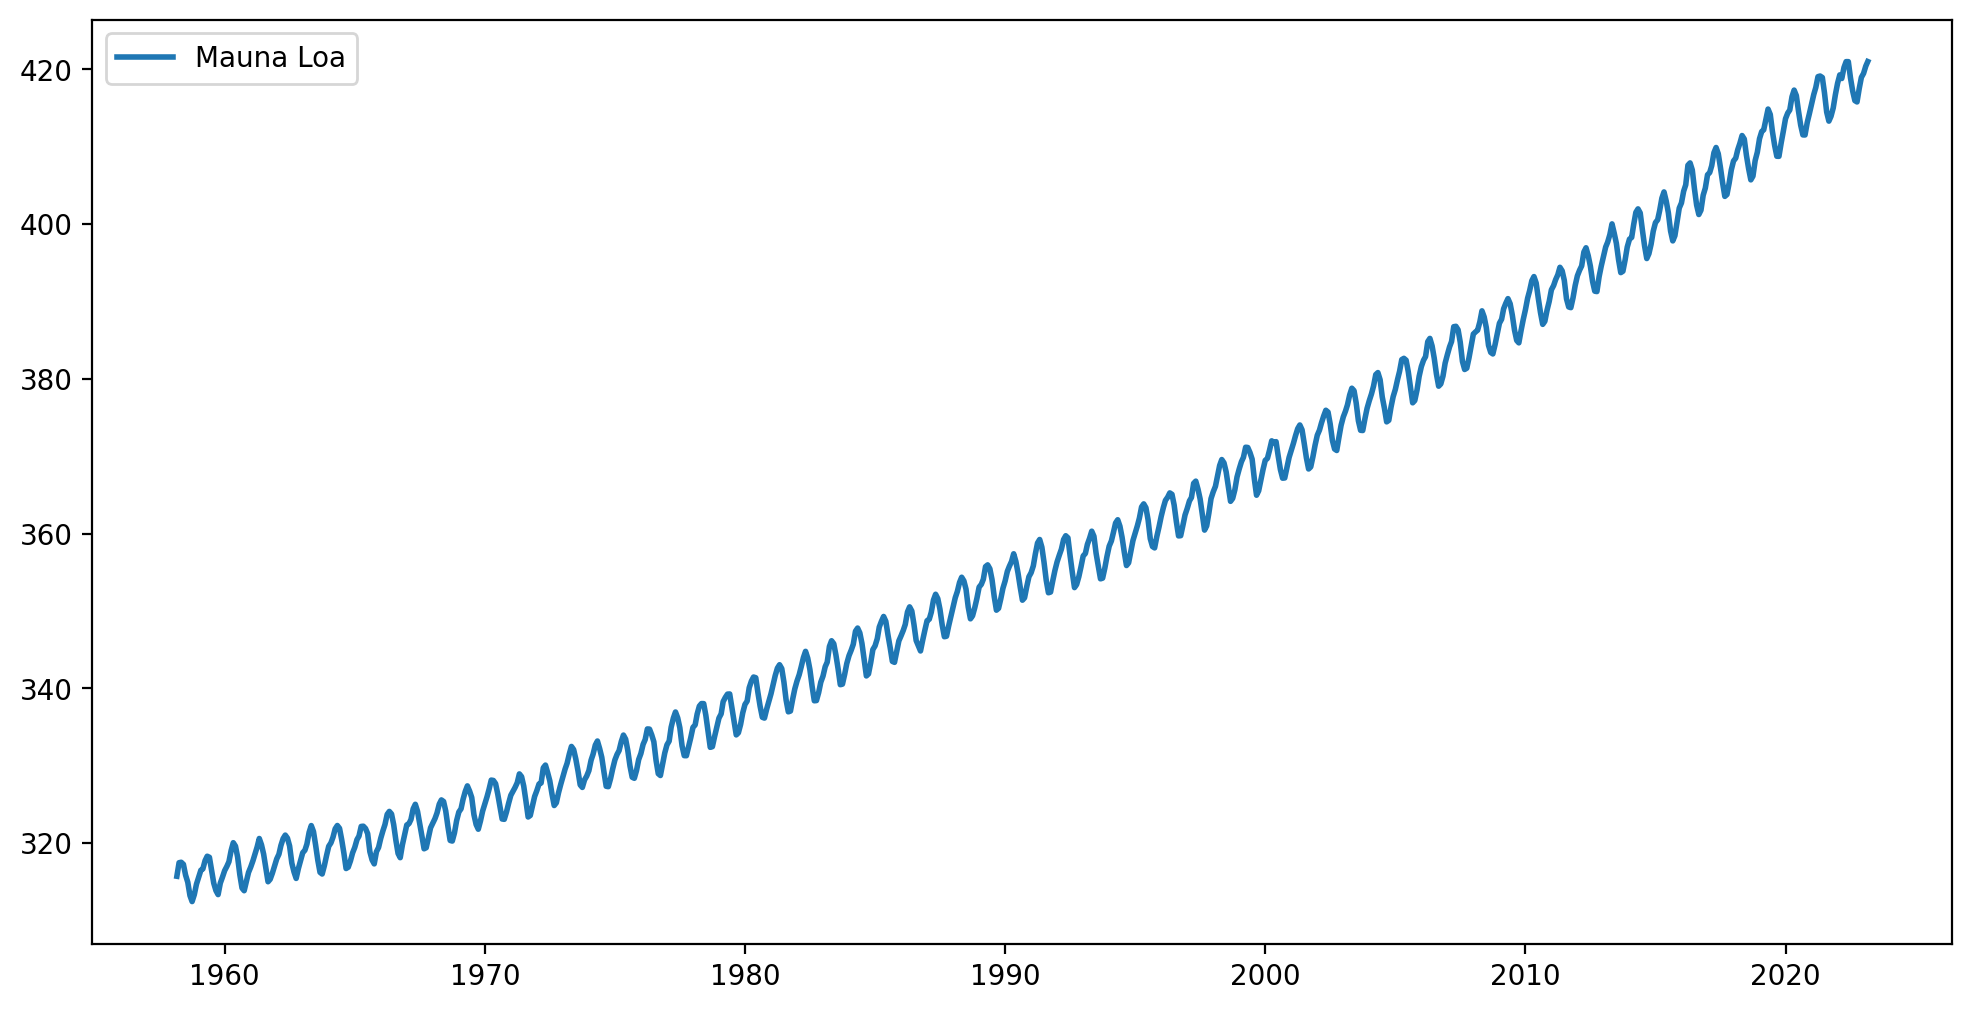

In [70]:
plt.plot(df_CO2['Date'],
         df_CO2['Mauna Loa CO2 (ppm)'],
         linewidth=2, label = 'Mauna Loa')
plt.legend()

### What if we wanted to customize this more?

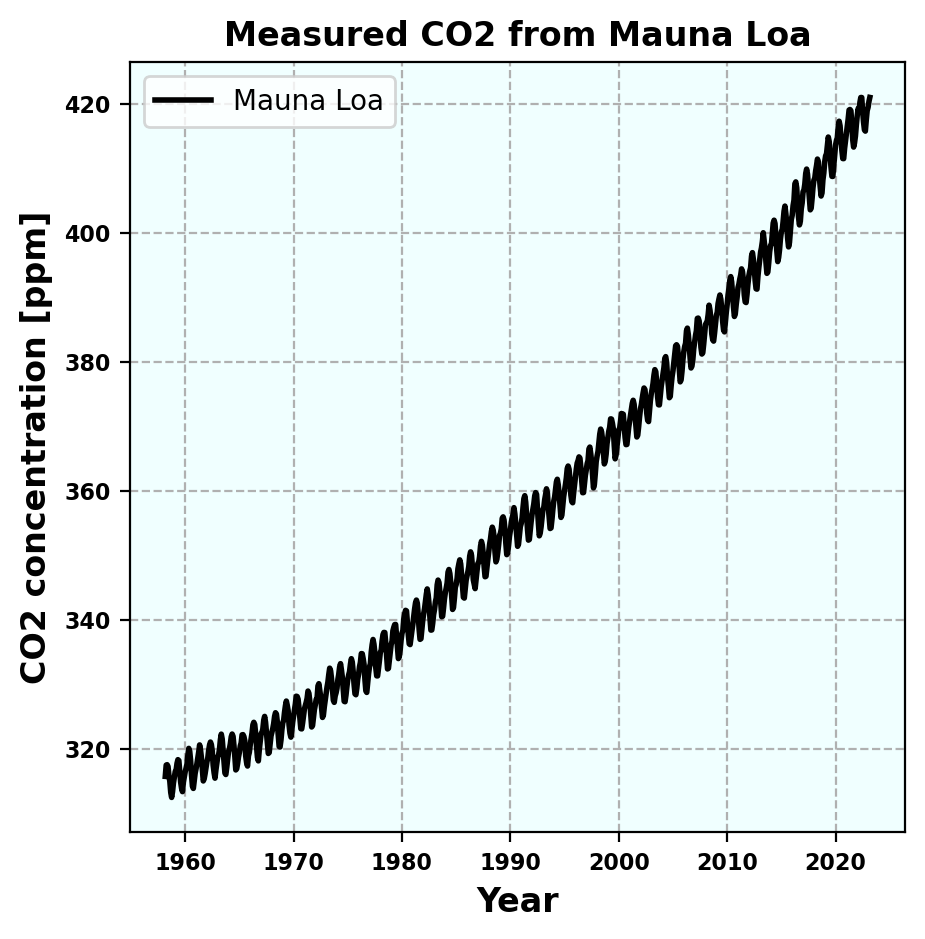

In [97]:
## Create your figure and axis objects using the subplots() 
## function from pyplot (which you imported using the alias plt):

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

plt.plot(df_CO2['Date'],
         df_CO2['Mauna Loa CO2 (ppm)'],
         linewidth=2,label='Mauna Loa',
         color='black')

## Set properties of title, ylabels and xlabels
ax.set_title('Measured CO2 from Mauna Loa',
             fontsize=12, fontweight='bold')
ax.set_ylabel('CO2 concentration [ppm]',
             fontsize=12, fontweight='bold')
ax.set_xlabel('Year',
             fontsize=12, fontweight='bold')

plt.legend() ## Add legend, with label corresponding the label you set in the plt.plot() above.
plt.grid(linestyle='--') ## Add dashed grid lines

## adjust ticklabel font properties:
for tick in ax.get_xticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
    
## Change background color
# Setting the background color of the plot
# using set_facecolor() method

ax.set_facecolor("azure")

### Take some time now to play around with customizing this plot -- copy and paste the code above into the cell below and customize as you wish, exploring what each parameter does. Create a plot that you think is the most effective / visually appealing.

#### Use the following resources to explore how to customize some of the parameters:

##### Matplotlib Color Demos -- there are limitless options for color customization in Matplotlib:
##### https://matplotlib.org/stable/gallery/color/color_demo.html#sphx-glr-gallery-color-color-demo-py
##### https://matplotlib.org/stable/tutorials/colors/colors.html
##### https://matplotlib.org/stable/gallery/color/named_colors.html (list of named colors)

### Now that you know how to open up and work with a CSV file, our next task will be becoming familiar with customizing plots using Matplotlib! Continue on to the Matplotlib tutorial!